In [1]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

# import gzip
# from cyvcf2 import VCF

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

from itertools import combinations
from ast import literal_eval

import sys
import os

home_dir = '~/Documents/Stanford/Research/EvolvingFront'
home_dir = os.path.expanduser(home_dir)

# tools_path = f'{home_dir}/code/processing/tools/tools.py'
# sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
# import tools as tools

# atish_assay_path =f'2%5%_FitnessMeasurement/code/fitness_assay_grantedits.py'
# sys.path.append(os.path.dirname(os.path.expanduser(atish_assay_path)))
# import fitness_assay_grantedits as atish

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

In [21]:
ancestor = 'Ira1_Mis'
evolution_condition = 'Evo2D'


condition = 'Evo1D_IRAs'
reps = [1,2]
timepoints = [0,1,4,7,10,13,16,19,22,24]

condition = 'Evo1D_TCG'
reps = [1,2]
timepoints = [0,1,4,8,10,13,16,19,22,24]

# condition = 'Evo2D_Ira1_Mis'
# condition = 'Evo2D_Ira1_Non'
reps = [1,2]
timepoints = [0,1,4,7,10,13,17,21,25]

condition = 'Evo3D_Ira1_Mis'
# condition = 'Evo3D_Ira1_Non'
reps = [1,2,3]
timepoints = [0,1,4,7,10,14,17,21]

# condition = 'Evo3D_TCG'
# reps = [1,2]
# timepoints = [0,1,4,7,10,14,17,21]



all_samples = []
for time in timepoints:
    if time == 0:
        all_samples.append(f'{condition}_0_0')
    else:
        for rep in reps:
            all_samples.append(f'{condition}_{rep}_{time}')



In [22]:
df = p.read_csv(f'{home_dir}/data/EvolutionTrajectory_counts/{condition}_counts_curated.csv')

[4317005. 3821618. 2822173. 3642324.  831007. 3638530. 2804979. 2676094.]
[4317005. 3796454. 4803045. 4047253. 2631903. 3235515. 3212201. 3255475.]
[4317005. 2439096. 3260593. 4069998. 3339155. 3434732. 3875812. 2166533.]


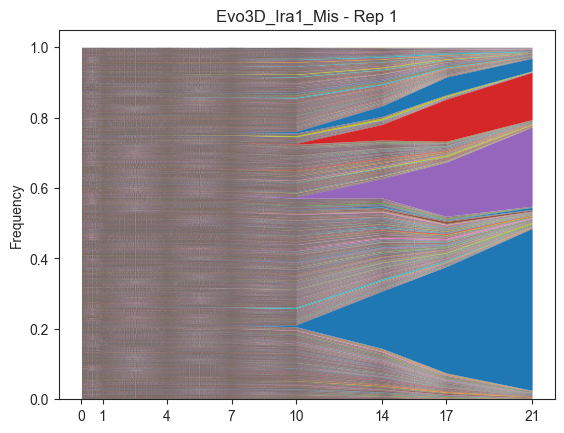

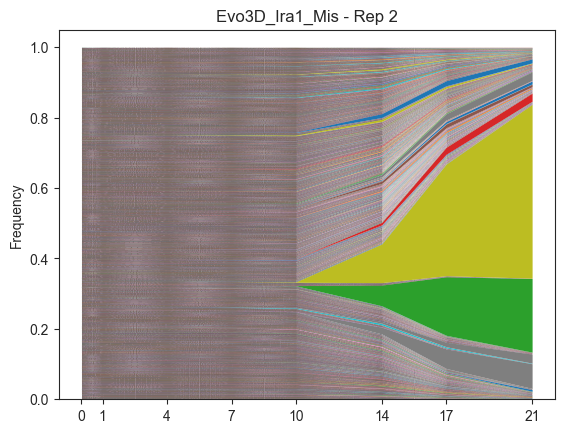

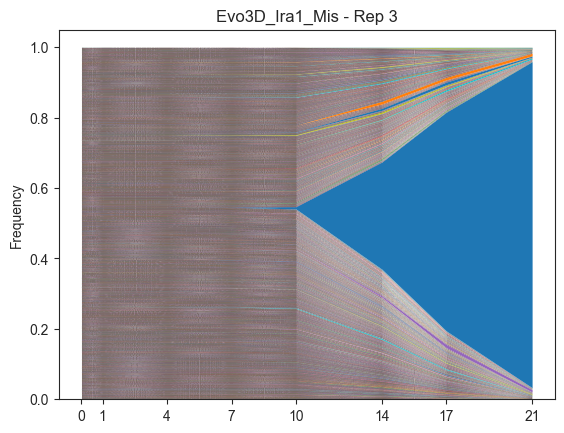

In [24]:
coverage_cutoff = 1e5
# coverage_cutoff = 100

for rep in reps:
    exclude_times = []
    these_timepoints = [time for time in timepoints if time not in exclude_times]

    these_times = [f'{condition}_{rep}_{time}_count' for time in these_timepoints if time != 0]
    these_times = [f'{condition}_0_0_count'] + these_times

    these_counts = df[these_times].values
    

    these_freqs = these_counts/np.nansum(these_counts,axis=0)
#     these_freqs = these_counts[:1000,:]/np.nansum(these_counts[:1000,:],axis=0)
    print(np.nansum(these_counts,axis=0))
    
    
    low_coverage = np.where(np.nansum(these_counts,axis=0)<coverage_cutoff)[0]
    
    these_freqs = np.delete(these_freqs,low_coverage,axis=1)
    these_times = np.delete(these_times,low_coverage)
    these_timepoints = np.delete(these_timepoints,low_coverage)
    
    plt.figure()
    plt.stackplot(these_timepoints,these_freqs,lw=0)
    
#     plt.figure()
#     plt.plot(these_timepoints,these_freqs.swapaxes(0,1)[:,:],alpha=0.1)
#     plt.yscale('log')
    plt.xticks(these_timepoints,these_timepoints)
#     plt.xlabel('Transfer')
    plt.ylabel('Frequency')
    plt.title(f'{condition} - Rep {rep}')
#     plt.savefig(f'{condition}_{rep}_trajectories_dark.pdf',bbox_inches='tight')
    plt.savefig(f'{home_dir}/figures/analysis/evolution_trajectories/{condition}_{rep}_muller.pdf',bbox_inches='tight')
    plt.savefig(f'{home_dir}/figures/analysis/evolution_trajectories/{condition}_{rep}_muller.png',dpi=300,bbox_inches='tight')

In [14]:
# these_timepoints

In [15]:
these_counts[:100,:].shape

(100, 9)

In [16]:
# these_freqs = these_counts[:,:100]/np.nansum(these_counts[:,:100],axis=0)

 ...]

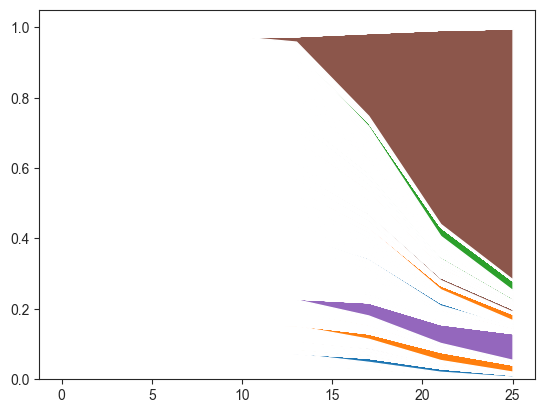

In [19]:
plt.stackplot(these_timepoints,these_freqs)